<a href="https://colab.research.google.com/github/meetv123/Covid-Impact-of-Air-Pollution-before-and-after-lockdown/blob/master/Covid_19_Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Covid-19:Impact of Air Pollution before and after lockdown</b></h1>

---

<h2><b>By Meet Vanani</b></h2>





<h3>Abstraction:</h3>

> This data analysis report consists of deep analysis of major pollutants in 24 cities causing air pollution. Analysis is done from 2015-01-01 to 2020-05-01 of all  24 cities. This report also analyse about the yearly and monthly behaviour of major pollutants. With visualizations, it depicts the major impact of air pollution before and after lockdown in major cities. Before starting with the analysis and visualization, this report also explains about the major pollutants and from where they are emitted majorly.













<h3>Types of Air Pollutants</h3>

> Let's first try and understand the various types of air pollutants in the datasets. On a broader level, these pollutants can be classified as :


![image.png](attachment:image.png)



*  <b>Particulate matter (PM2.5 and PM10)</b> > Particulate matter is a mix of solids and 
liquids, including carbon, complex organic chemicals, sulphates, nitrates, mineral dust, and water suspended in the air. PM varies in size. Some particles, such as dust, soot, dirt or smoke are large or dark enough to be seen with the naked eye. But the most damaging particles are the smaller particles, known as PM10 and PM2.5.Source. The following diagram will help to understand the concept more concretely.


* <b>Nitrogen Oxides (NO, NO2, NOx)</b> > Nitrogen oxides are a group of seven gases and compounds composed of nitrogen and oxygen, sometimes collectively known as NOx gases.The two most common and hazardous oxides of nitrogen are nitric oxide(NO) and nitrogen dioxide(NO2)


* <b>Sulphur Dioxide(SO2)</b> > Sulphur dioxide, or SO2 is a colorless gas with a strong odour, similar to a just-struck match. It is formed when fuel containing sulphur, such as coal and oil, is burned, creating air pollution.


* <b>Carbon Monoxide(CO)</b> > Carbon monoxide is a colorless, highly poisonous gas. Under pressure, it becomes a liquid. It is produced by burning gasoline, natural gas, charcoal, wood, and other fuels.


* <b>Benzene, Toluene and Xylene (BTX)</b> > Benzene, toluene, xylene, and formaldehyde are well-known indoor air pollutants, especially after house decoration. They are also common pollutants in the working places of the plastic industry, chemical industry, and leather industry


* <b>Ammonia( NH3)</b> > Ammonia pollution is pollution by the chemical ammonia (NH3) – a compound of nitrogen and hydrogen which is a by product of agriculture and industry.


* <b>Ozone(O3)</b> > Ground-level ozone is a colorless and highly irritating gas that forms just above the earth's surface. It is called a "secondary" pollutant because it is produced when two primary pollutants react in sunlight and stagnant air. These two primary pollutants are nitrogen oxides (NOx) and volatile organic compounds (VOCs)

<h3>What causes these polutants?</h3>

> <b>Vehicles</b>: Transportation majorly emits Carbon Monoxide(CO) and Nitrogen Oxide(NO). It minorly emits Ozone(O3) and Particulate Matter (PM2.5 and PM10).



> <b>Industries</b>: Industries majorly emit Sulphur Dioxide (SO2), Carbon Monoxide(CO), Ammonia(NH3) and Particulate Matter (PM2.5 and PM10), BTX ( Benzene, toluene, xylene)







<h3>Methodology</h3>

> In this notebook, the analysis has been done in two parts:

* Analysis of the pollution level in India, over the years - from 2015 to 2020

> This will a holistic view of how the pollutant levels have been rising in India and what is the current situation.

* Effect of Locksown on the Pollution level in India

> Here we shall examine the pollution level in India before and after the first stage of Lockdown. Also we shall compare the pollution level around the same months in 2019, to see the the difference, if any. Additionally we could also examine the difference between the the current dates and the winter months(October, November) of 2019 when the pollution levels are generally the highest in Northern parts of India.

Analyzing data under these different categories should give us a fair idea of the effect of Lockdown on the Indian pollution level.

<h3> Import Libraries</h3>
First, we will import important libraries which will help us in complex calculations, algorithms and visualization of data in a easy way.These libraries are:

* numpy
* pandas
* os
* matplotlib
* seaborn
* pycountry
* plotly
* cufflinks
* folium
* bar_chart_race

In [0]:
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')


In [0]:
pip install bar_chart_race

In [0]:
from google.colab import files
import io
filename = files.upload()

Saving city_day1.csv to city_day1 (2).csv


<h3> 1. A look at the Dataset</h3>
We will first have a look on the dataset before proceeding for analysis. Here we will look onto the whole dataset, number of cities.

In [0]:
df = pd.read_csv((io.BytesIO(filename['city_day1.csv'])))
df

City        Date  PM2.5  ...  Xylene   AQI    AQI_Bucket
0               Ahmedabad  2015-01-01    NaN  ...    0.00   NaN           NaN
1               Ahmedabad  2015-01-02    NaN  ...    3.77   NaN           NaN
2               Ahmedabad  2015-01-03    NaN  ...    2.25   NaN           NaN
3               Ahmedabad  2015-01-04    NaN  ...    1.00   NaN           NaN
4               Ahmedabad  2015-01-05    NaN  ...    2.78   NaN           NaN
...                   ...         ...    ...  ...     ...   ...           ...
26214  Thiruvananthapuram  2020-04-27  14.13  ...     NaN  63.0  Satisfactory
26215  Thiruvananthapuram  2020-04-28  23.84  ...     NaN  60.0  Satisfactory
26216  Thiruvananthapuram  2020-04-29  18.54  ...     NaN  57.0  Satisfactory
26217  Thiruvananthapuram  2020-04-30  20.57  ...     NaN  57.0  Satisfactory
26218  Thiruvananthapuram  2020-05-01  17.58  ...     NaN  82.0  Satisfactory

[26219 rows x 16 columns]

In [0]:
cities = df['City'].value_counts()
len(cities)

24

There are 24 cities in the data set.

In [0]:
cities

Ahmedabad             1948
Bengaluru             1948
Lucknow               1948
Mumbai                1948
Chennai               1948
Delhi                 1948
Hyderabad             1945
Patna                 1797
Gurugram              1618
Amritsar              1160
Jorapokhar            1108
Jaipur                1053
Thiruvananthapuram    1051
Amaravati              890
Brajrajnagar           877
Talcher                864
Kolkata                753
Guwahati               441
Shillong               249
Chandigarh             243
Bhopal                 228
Kochi                  101
Ernakulam              101
Aizawl                  52
Name: City, dtype: int64

<h3><b> 1.1 Missing values </b></h3>
It is always good to have a look on the missing values before we do further analysis as it helps us in more accurate result.Here we will look number of missing values in each column of dataset.

In [0]:
df.isnull().sum()

It seems we have a lot of null values present in columns.
The main reason for these missing values are:
* Maybe, AQI was not measured in a particular city during particular day or dates.
* Due to error in calculation of AQI.

Converting string to datetime64

In [0]:
df['Date'] = pd.to_datetime(df['Date'])

<h3><b> 2. Analysing City level data.</b></h3>
We will start analyzing the data of all cities and their major pollutants that causes air pollution.

<h4><b>2.1 Combining Benzene Toluene and Xylene together as BXT</b></h4>

In [0]:
df['BTX'] = df['Benzene']+df['Toluene']+df['Xylene']
df.drop(['Benzene','Toluene','Xylene'],axis=1);

<h4><b>2.2 Combining  PM2.5 and PM10 as PM</b></h4>

In [0]:
df['PM'] = df['PM2.5']+df['PM10']
df = df.drop(['PM2.5','PM10'],axis = 1)

In [0]:
df

City       Date     NO  ...    AQI_Bucket    BTX     PM
0               Ahmedabad 2015-01-01   0.92  ...           NaN   0.02    NaN
1               Ahmedabad 2015-01-02   0.97  ...           NaN  12.95    NaN
2               Ahmedabad 2015-01-03  17.40  ...           NaN  25.45    NaN
3               Ahmedabad 2015-01-04   1.70  ...           NaN  15.57    NaN
4               Ahmedabad 2015-01-05  22.10  ...           NaN  28.68    NaN
...                   ...        ...    ...  ...           ...    ...    ...
26214  Thiruvananthapuram 2020-04-27   5.60  ...  Satisfactory    NaN  48.40
26215  Thiruvananthapuram 2020-04-28   6.27  ...  Satisfactory    NaN  68.16
26216  Thiruvananthapuram 2020-04-29   6.17  ...  Satisfactory    NaN  53.02
26217  Thiruvananthapuram 2020-04-30   6.28  ...  Satisfactory    NaN  68.76
26218  Thiruvananthapuram 2020-05-01   2.56  ...  Satisfactory    NaN  55.07

[26219 rows x 16 columns]

<h4><b>2.3 Subsetting the columns</b></h4>

In [0]:
pollutants = ['PM','NH3','NOx','NO','NO2', 'CO', 'SO2','O3', 'BTX']

<h4><b>2.4 Visualising yearly data of all pollutants and study the behaviour of the pollutants</b></h4>

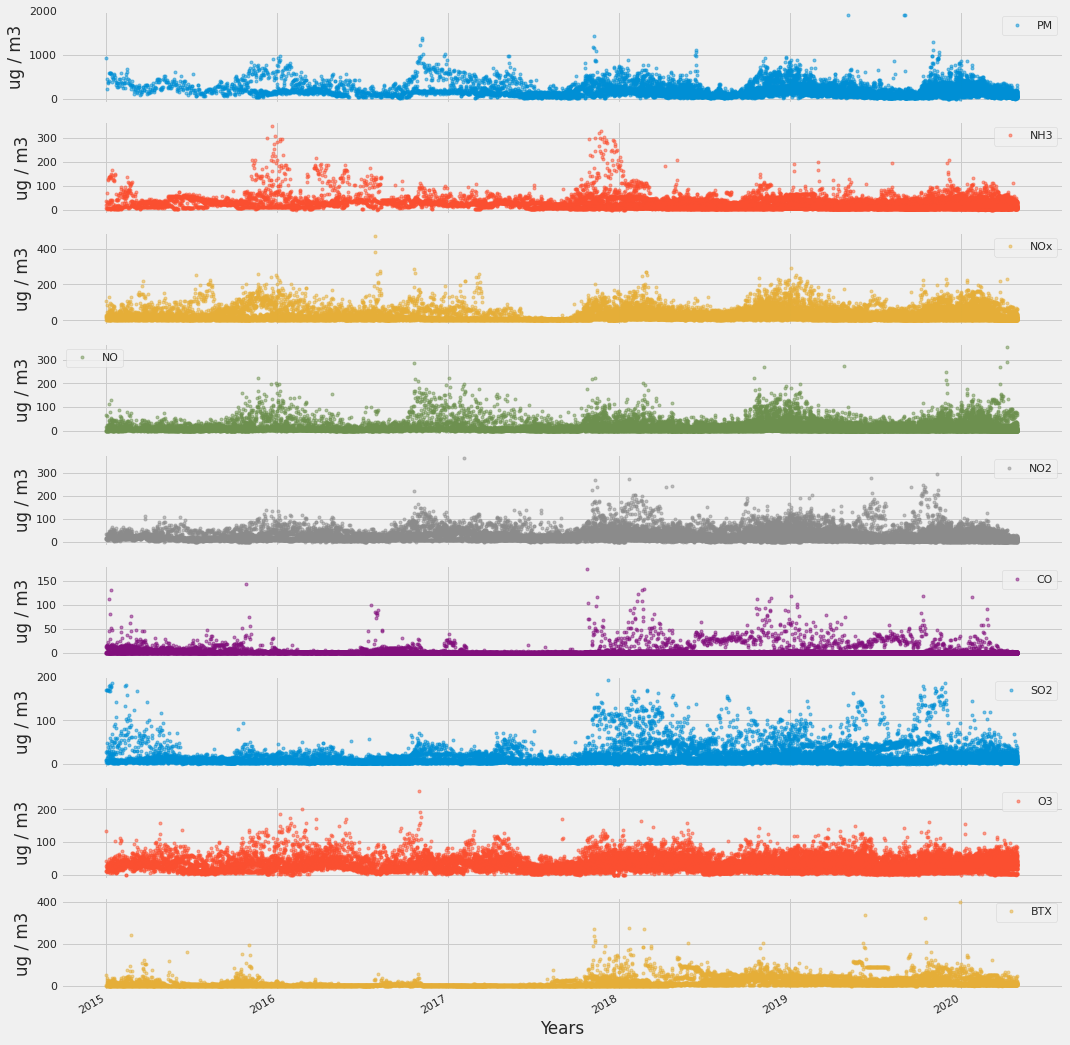

In [0]:
df.set_index('Date',inplace=True)
axes = df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

The main things we see in visualization are:


1.  SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also. This sudden rise indicates that there are more Industries setting up after 2017 and also increase in emission of these pollutants.
2.   CO and NO gradually increase after 2018 which clearly indicates that people were using more vehicles from 2018

This is just an overview. We will have to look deeper to get specific answers.

In [0]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df1['year'] = [d.year for d in df1.Date]
    df1['month'] = [d.strftime('%b') for d in df1.Date]
    years = df1['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df1, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df1.loc[~df1.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

<h3>NO2</h3>

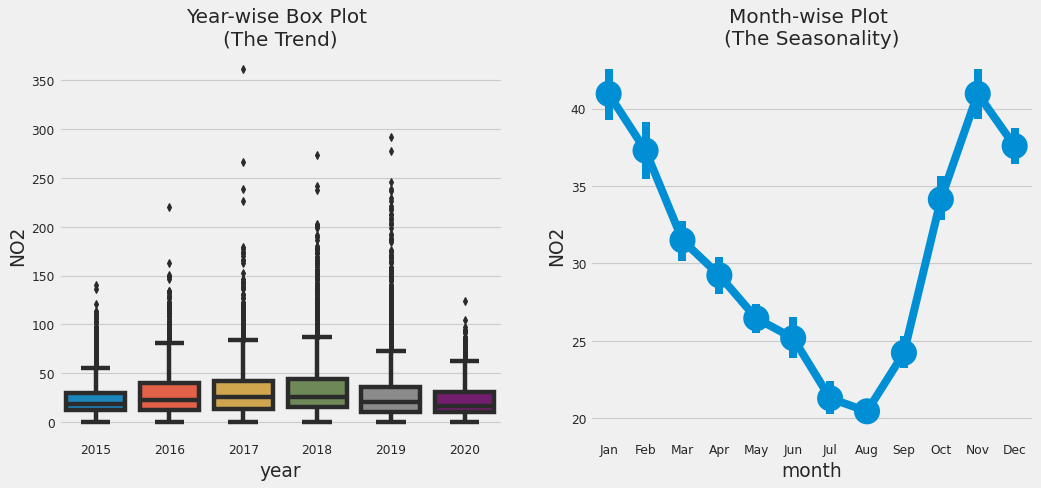

In [0]:
df.reset_index(inplace=True)
df1 = df.copy()
value='NO2'
trend_plot(df1,value)

<h3>SO2</h3>

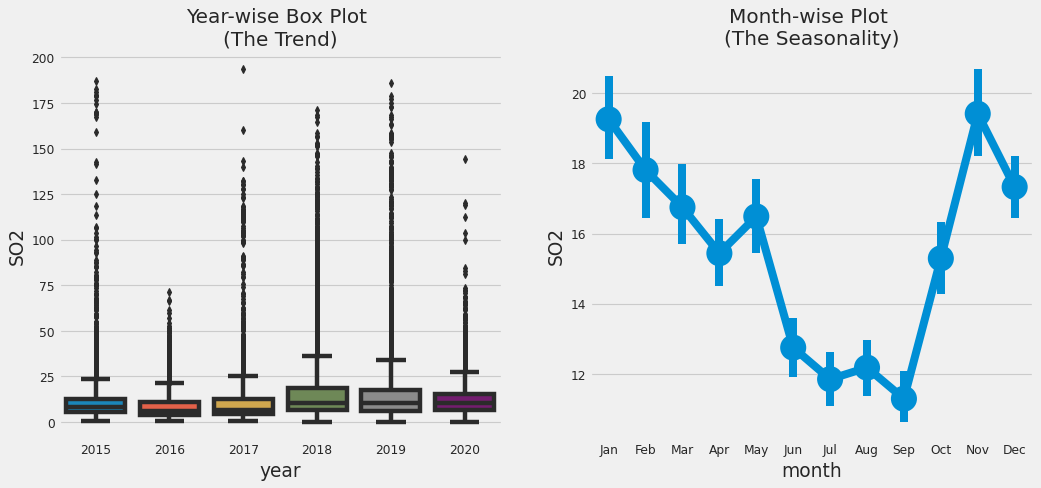

In [0]:
df1 = df.copy()
value='SO2'
trend_plot(df1,value)

<h3>Benxene,Toulene,Xylene (BTX)</h3>

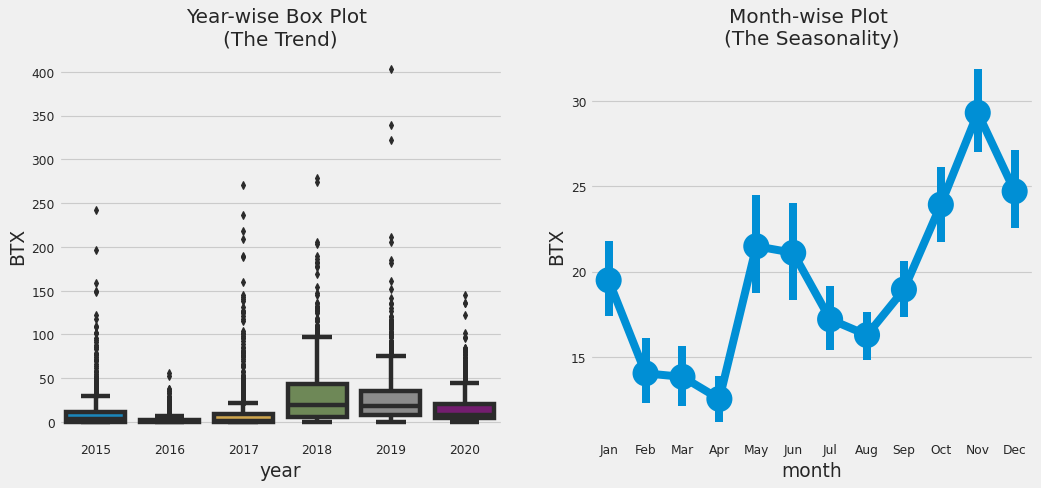

In [0]:
value='BTX'
trend_plot(df1,value)

<h3>PM2.5 and PM10 (PM)</h3>

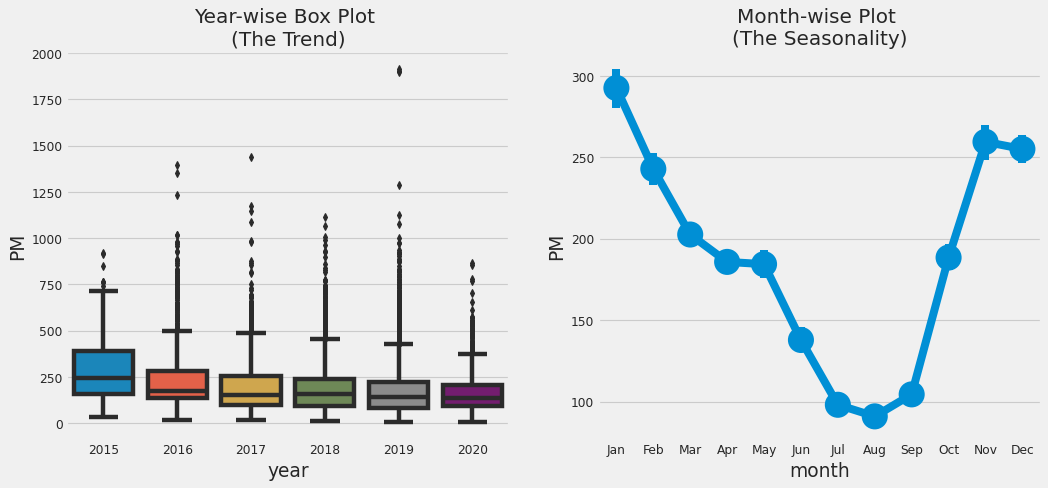

In [0]:
value='PM'
trend_plot(df1,value)

<h3>NOx</h3>

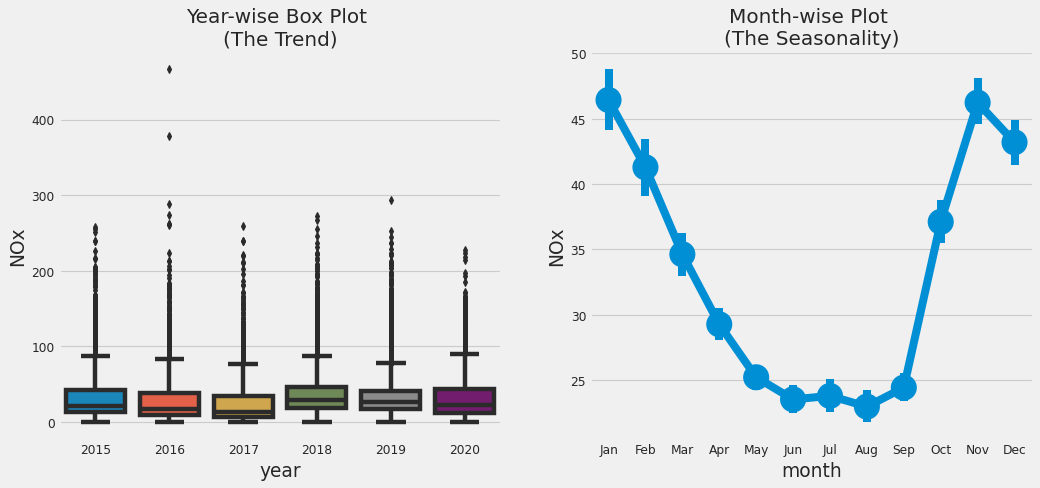

In [0]:
value='NOx'
trend_plot(df,value)

<h3>NO</h3>

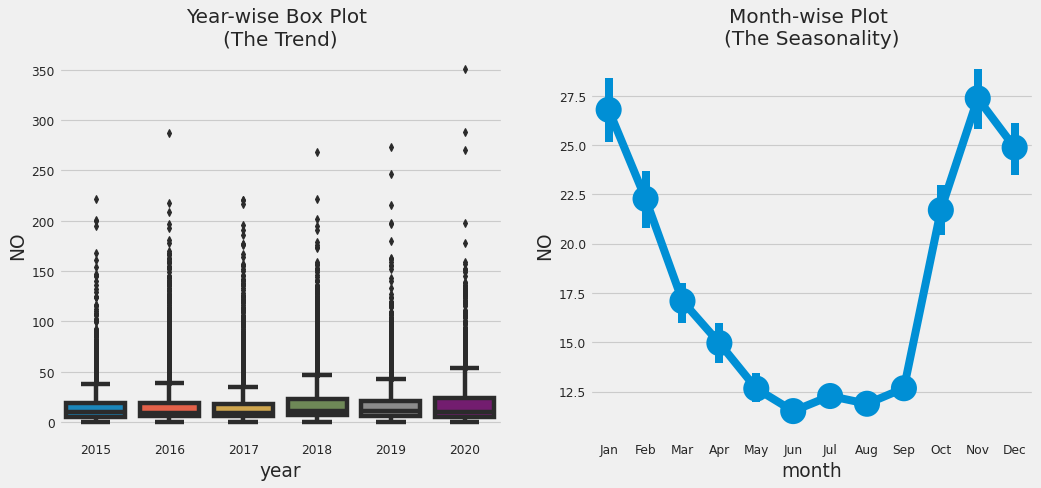

In [0]:
value='NO'
trend_plot(df1,value)

<h3>O3</h3>

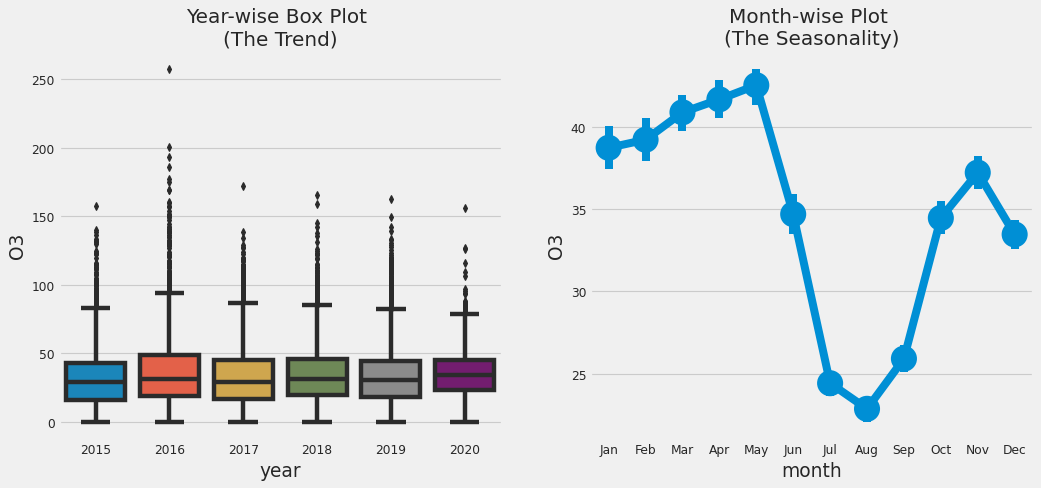

In [0]:
value='O3'
trend_plot(df,value)

<h3>NH3</h3>

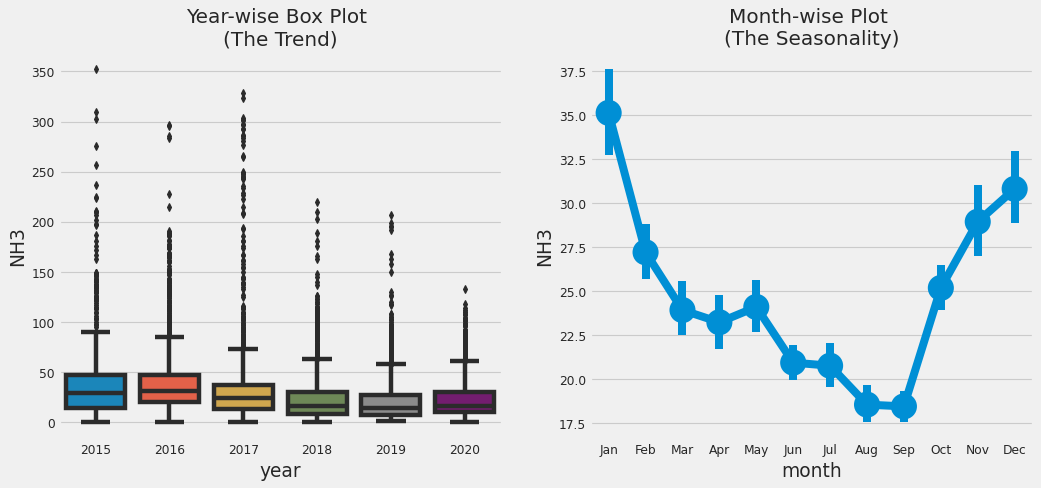

In [0]:
value='NH3'
trend_plot(df,value)

By these yearly and monthly plot we can say following thing:
* There is a clear trend that pollution level in India falls in the month of July and August. This might be majorly because monsoon season sets in during these months.The BTX levels additionally show a major decline around April.
* The pollution level then start rising and reach highest level in winter months. Again, its during these months that a lot of crop residue burning takes place,especially in northern parts of India.
* SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.This depicts that Industries are gradually increasing from 2017 because emission of SO2 and BTX mainly comes from Industries.
* The median values of 2020 are generally less as compared to other years giving us a sense that there might be a reduction on pollution lately.
* Nitrogen Oxide(NO) is gradually increasing yearly and this depicts that number of usage of vehicles is increasing yearly. Also emission of NO is high during Summers and Winters which clearly depicts that usage of vehicles is high during summers and winters as Vehicles emits NO in high volume

<h3><b> 3. Most Polluted Cities in India</b></h3>
Let's now look at the Indian cities which contribute to maximum pollution. We shall output the top 10 cities in each pollutant category by mean concentration of the pollutant over the years.Government of India has laid down National Ambient Air Quality standards (NAAQS) for twelve air pollutants, namely, PM10, PM2.5, Carbon Monoxide (CO), Sulphur Dioxide (SO2), Nitrogen Dioxide (NO2), Ammonia (NH3), ground level Ozone (O3), Lead, Arsenic, Nickel, Benzene and Benzo (a) Pyrene. The relevant standards are mentioned below:

![image.png](attachment:image.png)

In [0]:
def max_polluted_city(pollutant):
    x1 = df[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [0]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [0]:
pm = max_polluted_city('PM')
nox = max_polluted_city('NOx')
no3 = max_polluted_city('NO')
no = max_polluted_city('NO')
nh3 = max_polluted_city('NH3')
o3 = max_polluted_city('O3')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')


display_side_by_side(pm,nox,no3,no,o3,nh3,no2,so2,co,btx)

City PM 
 
 0 
 Delhi 
 358.080000 
 
 
 1 
 Gurugram 
 300.000000 
 
 
 2 
 Talcher 
 245.310000 
 
 
 3 
 Patna 
 231.860000 
 
 
 4 
 Jorapokhar 
 200.460000 
 
 
 5 
 Guwahati 
 196.790000 
 
 
 6 
 Bhopal 
 193.090000 
 
 
 7 
 Kolkata 
 191.250000 
 
 
 8 
 Brajrajnagar 
 187.860000 
 
 
 9 
 Jaipur 
 180.380000 
 
 City NOx 
 
 0 
 Kochi 
 78.340000 
 
 
 1 
 Kolkata 
 67.470000 
 
 
 2 
 Delhi 
 59.720000 
 
 
 3 
 Mumbai 
 56.170000 
 
 
 4 
 Guwahati 
 49.510000 
 
 
 5 
 Ahmedabad 
 48.830000 
 
 
 6 
 Patna 
 46.050000 
 
 
 7 
 Jaipur 
 40.990000 
 
 
 8 
 Amritsar 
 35.970000 
 
 
 9 
 Ernakulam 
 35.680000 
 
 City NO 
 
 0 
 Kochi 
 83.070000 
 
 
 1 
 Delhi 
 39.920000 
 
 
 2 
 Ernakulam 
 33.430000 
 
 
 3 
 Mumbai 
 32.030000 
 
 
 4 
 Talcher 
 31.630000 
 
 
 5 
 Patna 
 31.120000 
 
 
 6 
 Kolkata 
 28.740000 
 
 
 7 
 Ahmedabad 
 23.230000 
 
 
 8 
 Guwahati 
 22.420000 
 
 
 9 
 Amritsar 
 18.530000 
 
 City NO 
 
 0 
 Kochi 
 83.070000 
 
 
 1 
 Delhi 
 39.920000 
 
 
 2 
 Ernakulam 
 33.430000 
 
 
 3 
 Mumbai 
 32.030000 
 
 
 4 
 Talcher 
 31.630000 
 
 
 5 
 Patna 
 31.120000 
 
 
 6 
 Kolkata 
 28.740000 
 
 
 7 
 Ahmedabad 
 23.230000 
 
 
 8 
 Guwahati 
 22.420000 
 
 
 9 
 Amritsar 
 18.530000 
 
 City O3 
 
 0 
 Bhopal 
 58.960000 
 
 
 1 
 Delhi 
 51.420000 
 
 
 2 
 Jaipur 
 45.940000 
 
 
 3 
 Ahmedabad 
 38.650000 
 
 
 4 
 Amaravati 
 38.560000 
 
 
 5 
 Patna 
 37.400000 
 
 
 6 
 Lucknow 
 36.880000 
 
 
 7 
 Thiruvananthapuram 
 35.160000 
 
 
 8 
 Mumbai 
 34.530000 
 
 
 9 
 Hyderabad 
 33.890000 
 
 City NH3 
 
 0 
 Chennai 
 64.490000 
 
 
 1 
 Delhi 
 42.340000 
 
 
 2 
 Gurugram 
 40.340000 
 
 
 3 
 Brajrajnagar 
 36.740000 
 
 
 4 
 Chandigarh 
 30.390000 
 
 
 5 
 Lucknow 
 30.320000 
 
 
 6 
 Jaipur 
 26.580000 
 
 
 7 
 Patna 
 23.870000 
 
 
 8 
 Aizawl 
 23.270000 
 
 
 9 
 Bengaluru 
 22.480000 
 
 City NO2 
 
 0 
 Ahmedabad 
 60.590000 
 
 
 1 
 Delhi 
 51.620000 
 
 
 2 
 Kolkata 
 43.040000 
 
 
 3 
 Patna 
 38.120000 
 
 
 4 
 Bhopal 
 37.490000 
 
 
 5 
 Lucknow 
 33.840000 
 
 
 6 
 Jaipur 
 33.330000 
 
 
 7 
 Hyderabad 
 28.520000 
 
 
 8 
 Bengaluru 
 28.420000 
 
 
 9 
 Mumbai 
 26.950000 
 
 City SO2 
 
 0 
 Ahmedabad 
 56.270000 
 
 
 1 
 Jorapokhar 
 34.530000 
 
 
 2 
 Talcher 
 29.060000 
 
 
 3 
 Patna 
 22.750000 
 
 
 4 
 Kochi 
 18.400000 
 
 
 5 
 Delhi 
 15.970000 
 
 
 6 
 Mumbai 
 15.360000 
 
 
 7 
 Guwahati 
 14.580000 
 
 
 8 
 Amaravati 
 14.470000 
 
 
 9 
 Bhopal 
 13.440000 
 
 City CO 
 
 0 
 Ahmedabad 
 23.180000 
 
 
 1 
 Lucknow 
 2.170000 
 
 
 2 
 Delhi 
 2.010000 
 
 
 3 
 Talcher 
 1.880000 
 
 
 4 
 Bengaluru 
 1.870000 
 
 
 5 
 Brajrajnagar 
 1.860000 
 
 
 6 
 Patna 
 1.570000 
 
 
 7 
 Ernakulam 
 1.370000 
 
 
 8 
 Gurugram 
 1.280000 
 
 
 9 
 Kochi 
 1.170000 
 
 City BTX 
 
 0 
 Kolkata 
 43.040000 
 
 
 1 
 Ahmedabad 
 37.100000 
 
 
 2 
 Delhi 
 27.260000 
 
 
 3 
 Patna 
 17.790000 
 
 
 4 
 Gurugram 
 17.510000 
 
 
 5 
 Amritsar 
 14.810000 
 
 
 6 
 Hyderabad 
 10.710000 
 
 
 7 
 Chandigarh 
 10.050000 
 
 
 8 
 Amaravati 
 3.470000 
 
 
 9 
 Ernakulam 
 2.340000

By these tables we can clearly assume:
* Patna, Delhi , Ahmedabad and Kolkata seem to top the charts. Ahmedabad has maximum concenterations of NO2,SO2 as well as CO levels.
* Kochi, Delhi, Ernakulam,Mumbai as high emission of NO which depicts that high usage of vehicles are there in these citiess.
* Ahmedabad has high  emission of BTX and SO2 which depicts these emission come from Industries.
* Delhi has very high emssion of PM which depicts high usage of vehicles as well as there are more number of Industries causing Air Pollution.

<h3><b>4. Effect of Lockdown on AQI</b></h3>
Let's now see how has the Lockdown affected the AQI levels in the prominent cities of India.For this we shall consider the data from 2019 onwards only. But before that let's understand what AQI is:

<h4><b>4.1 AQI : Air Quality Index</b></h4>
An air quality index (AQI) is used by government agencies[1] to communicate to the public how polluted the air currently is or how polluted it is forecast to become.There are six AQI categories, namely Good, Satisfactory, Moderately polluted, Poor, Very Poor, and Severe. The proposed AQI will consider eight pollutants (PM10, PM2.5, NO2, SO2, CO, O3, NH3, and Pb) for which short-term (up to 24-hourly averaging period) National Ambient Air Quality Standards are prescribed.[23] Based on the measured ambient concentrations, corresponding standards and likely health impact, a sub-index is calculated for each of these pollutants. The worst sub-index reflects overall AQI. Likely health impacts for different AQI categories and pollutants have also been suggested, with primary inputs from the medical experts in the group. The AQI values and corresponding ambient concentrations (health breakpoints) as well as associated likely health impacts for the identified eight pollutants are as follows:

![image.png](attachment:image.png)
source: https://app.cpcbccr.com/AQI_India/

<h4><b>4.2 AQI for some of the major cities of India</b></h4>
The cities that will be the subject of our study are - Ahmedabad, Delhi, Bengaluru, Mumbai,Hyderabad and Chennai.

In [0]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = df[df['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

Date       City     AQI AQI_Bucket
1461 2019-01-01  Ahmedabad  1474.0     Severe
1462 2019-01-02  Ahmedabad  1246.0     Severe
1463 2019-01-03  Ahmedabad  1719.0     Severe
1464 2019-01-04  Ahmedabad  1264.0     Severe
1465 2019-01-05  Ahmedabad  1127.0     Severe

In [0]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=("Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ahmedabad'],
                    marker=dict(color=AQI_pivot['Ahmedabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
               3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)
fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()

In [0]:
AQI_2020 = AQI_pivot[AQI_pivot.index > '2019-12-31']
bcr_html = bcr.bar_chart_race(df=AQI_2020, filename=None, period_length=300,orientation='v',figsize=(8, 6),bar_label_size=7,tick_label_size=7,title='AQI levels in 2020')
HTML(bcr_html)

<h4><b>4.4 AQI before and after Lockdown</b></h4> 
It'll be also interesting to see tha difference in AQI before and after the Lockdown.

In [0]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

In [0]:
print('AQI before Lockdown\n',AQI_beforeLockdown.mean())
print('AQI after Lockdown\n',AQI_afterLockdown.mean())

AQI before Lockdown
 City
Ahmedabad    383.776471
Bengaluru     96.023529
Chennai       80.317647
Delhi        246.305882
Hyderabad     94.435294
Mumbai       148.776471
dtype: float64
AQI after Lockdown
 City
Ahmedabad    127.972973
Bengaluru     68.513514
Chennai       62.189189
Delhi        107.378378
Hyderabad     65.675676
Mumbai        73.972973
dtype: float64


In [0]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation


In [0]:
from matplotlib.patches import Circle, Wedge, Rectangle
def gauge(labels=['GOOD','SATISFACTORY','MODERATE','POOR','VERY POOR','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    

"""
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()
    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
        verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

"Ahmedabad's AQI levels"

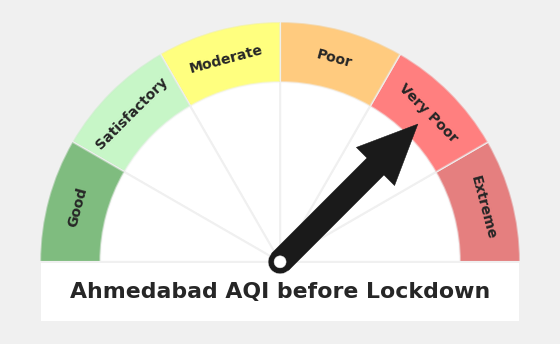

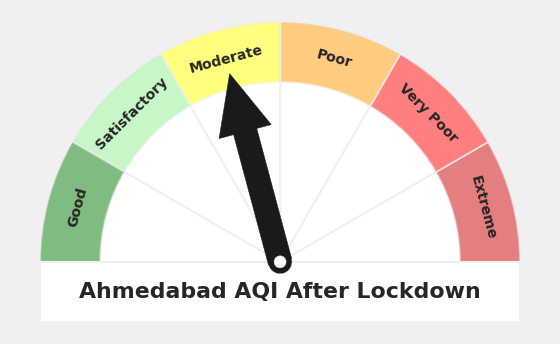

In [0]:
display("Ahmedabad's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=5, title='Ahmedabad AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title='Ahmedabad AQI After Lockdown')

"Delhi's AQI levels"

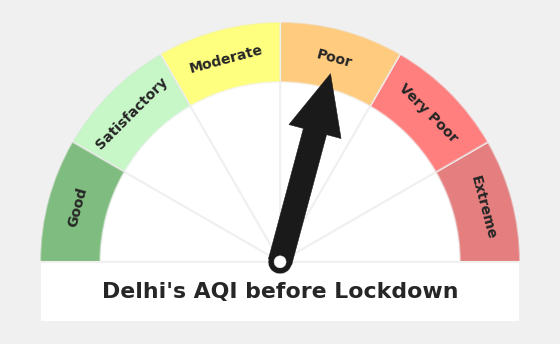

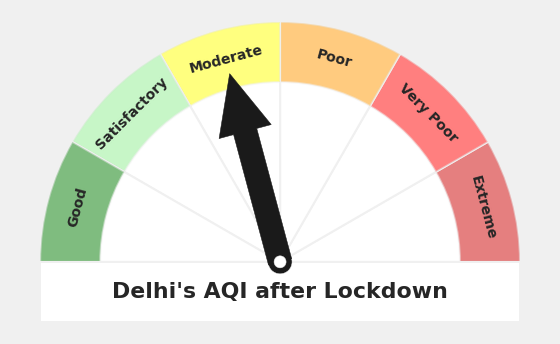

In [0]:
display("Delhi's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=4, title="Delhi's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Delhi's AQI after Lockdown")

"Mumbai's AQI levels"

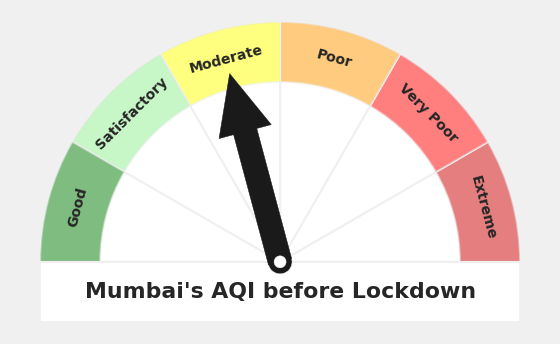

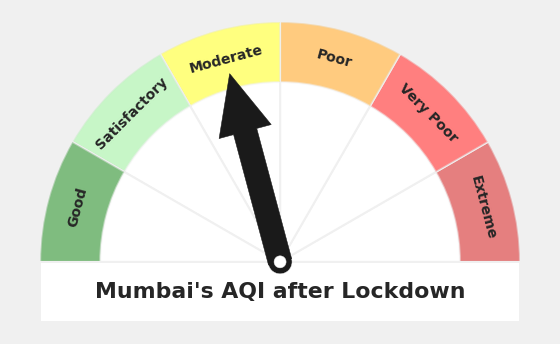

In [0]:
display("Mumbai's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI after Lockdown") 

<h3><b>5 Effect of Lockdown on levels of Individual pollutants</b></h3>
Let's compare the level of pollutants between January and April between between 2020 and 2019. This will give an idea whether the pollution levels have actually subsided or the pollution actually remains low during the onset of summer in India.

<h4><b>5.1 A comparison between pollution levels in 2020 VS 2019</b></h4>

In [0]:
start_date1 = '2019-01-01'
end_date1 = '2019-05-01'

mask1 = (df['Date'] >= start_date1) & (df['Date']  <= end_date1)
pollutants_filtered_2019 = df.loc[mask1]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-05-01'

mask2 = (df['Date'] >= start_date2) & (df['Date']  <= end_date2)
pollutants_filtered_2020 = df.loc[mask2]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);


df1 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)]
[['City','NO2','SO2','PM','CO']]
df2 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)]
[['City','NO2','SO2','PM','CO']]

[['City', 'NO2', 'SO2', 'PM', 'CO']]

In [0]:
def pollution_comparison(city):
    """
    Function to plot graph comparing pollutin levels between (Jan-May)2019 and (Jan-May)2020
    
    """
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['PM'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2019 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['PM'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2020 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

In [0]:
pollution_comparison('Ahmedabad')

In [0]:
pollution_comparison('Bengaluru')

In [0]:
pollution_comparison('Chennai')

In [0]:
pollution_comparison('Delhi')

In [0]:
pollution_comparison('Mumbai')

In [0]:
pollution_comparison('Hyderabad')

* It is interesting to note that the Polluiton level in India genrally drops down as summer approaches. This can also be corroborated by the graphs above.
* However, the reduction in march 2020 is more pronounced as compared to march 2019

<h3><b>6. Geographical Analysis using Dual Maps</b></h3>
A dual map let's you compare the values side by side.By clicking on the icons, you can see the value of AQI on the popups</a>

In [0]:
from google.colab import files
import io
filename = files.upload()

Saving Indian Cities Database.csv to Indian Cities Database.csv


In [0]:
cities_db = pd.read_csv((io.BytesIO(filename['Indian Cities Database.csv'])))

In [0]:
df11 = pollutants_filtered_2019[['City','AQI']]
df22 = pollutants_filtered_2020[['City','AQI']]

df_2019_coord = df11.groupby('City')['AQI'].mean().to_frame().reset_index()
df_2020_coord = df22.groupby('City')['AQI'].mean().to_frame().reset_index()

df_2019_AQI = pd.merge(df_2019_coord,cities_db,on='City')
df_2019_AQI['AQI'] = df_2019_AQI['AQI'].round(0)
df_2020_AQI = pd.merge(df_2020_coord,cities_db,on='City')
df_2020_AQI['AQI'] = df_2020_AQI['AQI'].round(0)

In [0]:
m = plugins.DualMap(location=(22.9734, 78.6569), tiles=None, zoom_start=5)

folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('openstreetmap').add_to(m)


fg_1 = folium.FeatureGroup(name='2019').add_to(m.m1)
fg_2 = folium.FeatureGroup(name='2020').add_to(m.m2)



for lat, lon, value, name in zip(df_2019_AQI['Lat'], df_2019_AQI['Long'], df_2019_AQI['AQI'], df_2019_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='red'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(fg_1)

for lat, lon, value, name in zip(df_2020_AQI['Lat'], df_2020_AQI['Long'], df_2020_AQI['AQI'], df_2020_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='orange'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='orange',
                        fill_opacity=0.7 ).add_to(fg_2)


folium.LayerControl(collapsed=False).add_to(m)

m

<h3><b> Conclusion: </b></h3>
Since 2016,the major pollutants were increasing gradually till the lockdown. We clearly see the reduction in emission of major pollutants which are causing air pollution due to lockdown as most of the industries are closed and usage of vehicles are very less.However it is difficult to predict till when this lockdown will remain in India but by looking at the current situation of Covid-19 in India, we can predict that there will be partial opening of the cities in India from lockdown. This will take few months which clearly indicate further decrease in air pollution.

<h3><b> References: </b></h3>
<ol>
    <li>Data source: <a> https://www.kaggle.com/rohanrao/air-quality-data-in-india/kernels</a></li>
<li>Information source: Wikipedia and Google</li>
    <li>Other important source: <a>https://app.cpcbccr.com/AQI_India/</a> </li>
</ol>